## Decision Tree

TamilSelvan 

Raja - Machine Learning Model - decision tree

1000 labelled dataset - training dataset

100 new data

Questions - what is author, which year published - attribute selection measures

Raja Predicts whether Tamil will like the book or not - Output / label - Like - YES/NO

## Problem Statement - Classify incoming data for kyphosis occurence (yes/no)

Link : http://www.stat.umn.edu/RegGraph/data/Kyphosis.lsp

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Import Dataset

In [2]:
df = pd.read_csv('dataset/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


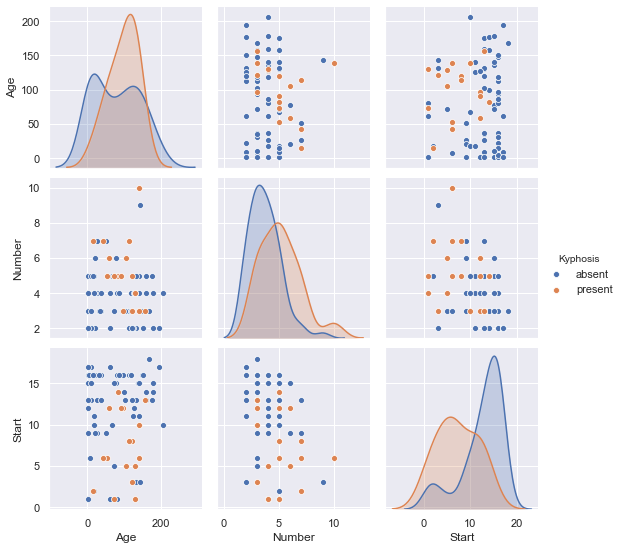

In [4]:
sns.pairplot(df,hue='Kyphosis')

### Train Test Split

In [5]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Train using decision tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Prediction

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = dtree.predict(X_train)

print(f'Train Accuracy Score: {accuracy_score(y_pred_train,y_train)}')
print(f'\n\nConfusion Matrix:\n {confusion_matrix(y_pred_train,y_train)}')
print(f'\n\nClassification Report:\n {classification_report(y_pred_train,y_train)}')


Train Accuracy Score: 0.9375


Confusion Matrix:
 [[47  1]
 [ 3 13]]


Classification Report:
               precision    recall  f1-score   support

      absent       0.94      0.98      0.96        48
     present       0.93      0.81      0.87        16

    accuracy                           0.94        64
   macro avg       0.93      0.90      0.91        64
weighted avg       0.94      0.94      0.94        64



In [29]:
y_pred_test = dtree.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_pred_test,y_test)}')
print(f'\n\nConfusion Matrix:\n {confusion_matrix(y_pred_test,y_test)}')
print(f'\n\nClassification Report:\n {classification_report(y_pred_test,y_test)}')

Test Accuracy Score: 0.7647058823529411


Confusion Matrix:
 [[12  2]
 [ 2  1]]


Classification Report:
               precision    recall  f1-score   support

      absent       0.86      0.86      0.86        14
     present       0.33      0.33      0.33         3

    accuracy                           0.76        17
   macro avg       0.60      0.60      0.60        17
weighted avg       0.76      0.76      0.76        17



### Visualization of decision trees

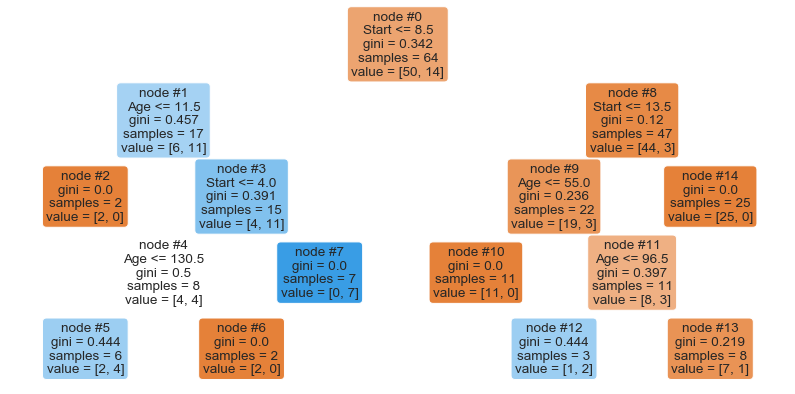

In [30]:
from sklearn.tree import plot_tree

features = list(df.columns[1:])

plt.figure(figsize=(14,7))

s = plot_tree(dtree,
             filled=True,
             rounded=True,
             feature_names=features,
             rotate=True,
             node_ids=True)

#### Visualizing Pydot way

In [31]:
from IPython.display import Image

from sklearn.externals.six import StringIO

from sklearn.tree import export_graphviz

import pydot

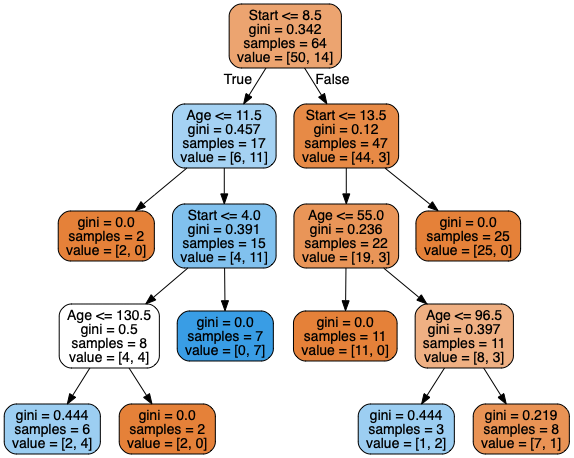

In [32]:
dot_data = StringIO()

export_graphviz(dtree,
                out_file=dot_data,
                feature_names=features,
                filled=True,
                rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())

In [25]:
X_train.shape

(64, 3)

# Great Job !